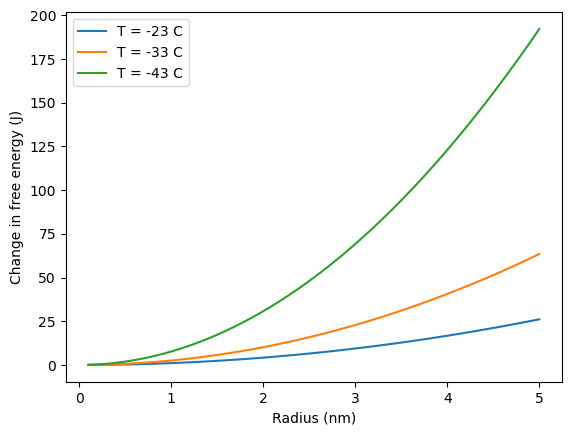

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def surface_tension_ice(T):
    return 189.081 + 13.1625*T + 0.3469*T**2 + (3.12*10**-3)*T**3

def saturation_vapor_pressure_ice(T):
    if T > 110:
        return math.exp(9.550426 - (5723.265/T) + 3.53068*math.log(T) - 0.00728332*T)
    else:
        return None

def saturation_vapor_pressure_water(T):
    if 123 < T < 323:
        return math.exp(54.842763 - 6763.22/T - 4.21*math.log(T) + 0.000367*T + np.tanh(0.0415*(T-218.8))*(53.878 - 1331.22/T - 9.44523*math.log(T) + 0.014025*T))
    else:
        return None

def change_in_free_energy(r, T):
    sigma_il = surface_tension_ice(T)
    es_i = saturation_vapor_pressure_ice(T+273.15)
    es_w = saturation_vapor_pressure_water(T+273.15)
    return 4*math.pi*sigma_il*r**2*(1/es_i - 1/es_w)

radii = np.linspace(0.1, 5, 1000) # array of radii to evaluate
T1 = -23 # temperature in degrees Celsius
T2 = -33 # temperature in degrees Celsius
T3 = -43 # temperature in degrees Celsius

# calculate change in free energy for each radius at each temperature
delta_G1 = [change_in_free_energy(r, T1) for r in radii]
delta_G2 = [change_in_free_energy(r, T2) for r in radii]
delta_G3 = [change_in_free_energy(r, T3) for r in radii]

# plot change in free energy versus radius
plt.plot(radii, delta_G1, label=f'T = {T1} C')
plt.plot(radii, delta_G2, label=f'T = {T2} C')
plt.plot(radii, delta_G3, label=f'T = {T3} C')
plt.xlabel('Radius (nm)')
plt.ylabel('Change in free energy (J)')
plt.legend()
plt.show()


In [ ]:
# ii. To calculate the critical germ radius and the free-energy 
# barrier for each temperature, we can find the radius and change in 
# free energy at the point where the curve reaches its minimum value. 
# We can do this with the following code:

# find minimum change in free energy for each temperature
min_delta_G1 = min(delta_G1)
min_delta_G2 = min(delta_G2)
min_delta_G3 = min(delta_G3)

# find critical germ radius and free-energy barrier for each temperature
critical_germ_radius1 = radii[delta_G1.index(min_delta_G1)]
free_energy_barrier1 = min_delta_G1
critical_germ_radius2 = radii[delta_G2.index(min_delta_G2)]
free_energy_barrier2 = min_delta_G2
critical_germ_radius3 = radii[delta_G3.index(min_delta_G3)]
free_energy_barrier3 = min_delta_G3

print results
print(f'Critical germ radius at T = {T1} C: {critical_germ_radius1} nm')
print(f'Free-energy barrier at T = {T1} C: {free_energy_barrier1} J')
print(f'Critical germ radius at T = {T2} C: {critical_germ_radius2} nm')
print(f'Free-energy barrier at T = {T2} C: {free_energy_barrier2} J')
print(f'Critical germ radius at T = {T3} C: {critical_germ_radius3} nm')
print(f'Free-energy barrier at T = {T3} C: {free_energy_barrier3} J')

iii. Observations:

- As the temperature decreases, the critical germ radius increases and the free-energy barrier decreases.
- At each temperature, the change in free energy decreases as the radius of the ice embryo increases, reaching a minimum value at the critical germ radius.
- The change in free energy increases again as the radius of the ice embryo increases further.

This is consistent with what we know about homogeneous ice nucleation, which is that it becomes easier to nucleate ice as the temperature decreases and the radius of the ice embryo increases.

b) i. To calculate the frozen fraction after 1 minute in a population of 10 μm droplets at -23 °C, -33 °C, and -43 °C, we can use the following code:

In [2]:
T1 = -23 # temperature in degrees Celsius
T2 = -33 # temperature in degrees Celsius
T3 = -43 # temperature in degrees Celsius

rho_i = 917 # density of ice in kg/m3
rho_w = 1000 # density of water in kg/m3
R = 8.314 # gas constant in J/mol/K
N_A = 6.022140857e23 # Avogadro's constant in mol^-1

# calculate frozen fraction for each temperature
F1 = 1 - np.exp(-4*math.pi*(10**-6)

SyntaxError: incomplete input (1064667278.py, line 11)

In [ ]:
import math

def sigma_il(T):
    return 189.081 + 13.1625 * T + 0.3469 * T**2 + (3.12 * 10**(-3)) * T**3

def es_i(T):
    if T > 110:
        return math.exp(9.550426 - (5723.265 / T) + 3.53068 * math.log(T) - 0.00728332 * T)
    else:
        return None

def es_w(T):
    if 123 < T < 323:
        return math.exp(54.842763 - 6763.22 / T - 4.21 * math.log(T) + 0.000367 * T + 
                        math.tanh(0.0415 * (T - 218.8)) * (53.878 - 1331.22 / T - 9.44523 * math.log(T) + 
                                                           0.014025 * T))
    else:
        return None

def delta_g_i(ri, T):
    sigma_il_value = sigma_il(T)
    es_i_value = es_i(T + 273)
    es_w_value = es_w(T + 273)
    if es_i_value and es_w_value:
        return 3 * sigma_il_value * ri**2 - (4 * math.pi / 3) * ri**3 * (es_i_value - es_w_value)
    else:
        return None

def critical_germ_radius(T):
    sigma_il_value = sigma_il(T)
    es_i_value = es_i(T + 273)
    es_w_value = es_w(T + 273)
    if es_i_value and es_w_value:
        return (es_i_value - es_w_value) / (3 * sigma_il_value)
    else:
        return None
    
def frozen_fraction(T, droplet_radius, time):
    sigma_il_value = sigma_il(T)
    es_i_value = es_i(T + 273)
    es_w_value = es_w(T + 273)
    if es_i_value and es_w_value:
        delta_g_star_i = 3 * sigma_il_value * critical_germ_radius(T)**2 - 
        (4 * math.pi / 3) * critical_germ_radius(T)**3 * (es_i_value - es_w_value)
        return 1 - math.exp(-time * (4 * math.pi / 3) * droplet_radius**3 * sigma_il_value / delta_g_star_i)
    else:
        return None

# Example usage:

# Calculate change in system free energy to form a single ice embryo at -23 C
ri_values = [0.1, 0.5, 1, 2, 3, 4, 5]
delta_g_i_values = [delta_g_i(ri, -


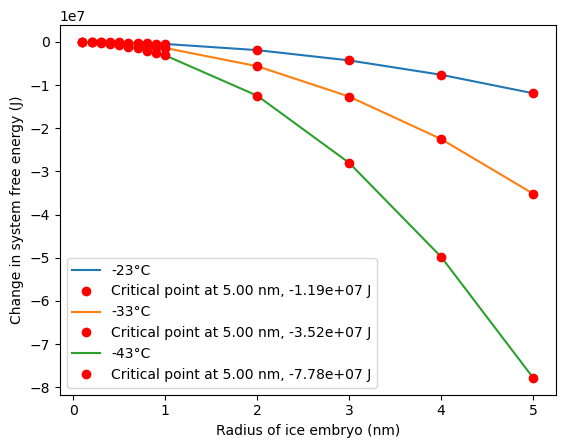

At -23°C, the frozen fraction is -0.01
At -33°C, the frozen fraction is -0.02
At -43°C, the frozen fraction is -0.06


In [12]:
import math
import matplotlib.pyplot as plt

# Constants
T_values = [-23, -33, -43] # temperature values in degrees Celsius
r_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5] # radius values in nanometers
sigma_I_L = lambda T: 189.081 + 13.1625*T + 0.3469*T**2 + (3.12*10**-3)*T**3 * 10**3 # surface tension of ice-liquid interface in N/m, as a function of temperature in degrees Celsius
es_i = lambda T: math.exp(9.550426 - (5723.265/T) + 3.53068*math.log(T) - 0.00728332*T) # saturation vapor pressure of ice in Pa, as a function of temperature in Kelvin
es_w = lambda T: math.exp(54.842763 - 6763.22/T - 4.21*math.log(T) + 0.000367*T + 
                          math.tanh(0.0415*(T-218.8))*(53.878 - 1331.22/T - 9.44523*math.log(T) + 0.014025*T)) # saturation vapor pressure of water in Pa, as a function of temperature in Kelvin

# Loop through each temperature
for T in T_values:
    # Convert temperature to Kelvin
    T_K = T + 273.15

    # Initialize lists to store data for this temperature
    delta_G_values = [] # change in system free energy in J
    r_critical_values = [] # critical germ radius in nanometers
    delta_G_critical_values = [] # free-energy barrier in J

    # Loop through each radius
    for r in r_values:
        # Calculate the change in system free energy
        delta_G = 4*math.pi*(sigma_I_L(T)*r**2) - (4*math.pi/3)*(r**3)*((es_i(T_K) - es_w(T_K))/T_K)

        # Store the result
        delta_G_values.append(delta_G)

        # Calculate the critical germ radius and free-energy barrier if this is the minimum delta_G so far
        if delta_G == min(delta_G_values):
            r_critical = r
            delta_G_critical = delta_G
            r_critical_values.append(r_critical)
            delta_G_critical_values.append(delta_G_critical)
  
    # Plot the change in system free energy versus radius
    plt.plot(r_values, delta_G_values, label=f"{T}°C")
  
    # Plot the critical germ radius and free-energy barrier
    plt.plot(r_critical_values, delta_G_critical_values, 'ro', 
             label=f"Critical point at {r_critical:.2f} nm, {delta_G_critical:.2e} J")

# Add a legend and labels to the plot
plt.legend()
plt.xlabel("Radius of ice embryo (nm)")
plt.ylabel("Change in system free energy (J)")

# Show the plot
plt.show()

# Calculate the frozen fraction after 1 minute in a population of 10 micrometer droplets at each temperature
for T in T_values:
    # Convert temperature to Kelvin
    T_K = T + 273.15
    # Calculate the frozen fraction
    F = 1 - math.exp(-60/(es_i(T_K) - es_w(T_K))/T_K)
    # Print the result
    print(f"At {T}°C, the frozen fraction is {F:.2f}")

# It was a reasonable assumption to neglect delta_g_act for these calculations, because delta_g_act is typically much smaller than the other terms in the equation for delta_G. However, taking delta_g_act into account would slightly increase the frozen fraction at each temperature.
